# Introduction
The data was extracted from the census bureau database found at https://www.census.gov/data.html

### Objective
The main goal is to predict whether a person income level over 50K a year or not.

# Data Acquisition

In [1]:
# Import Package and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch   # Used for reordering the correlation matrix

import sklearn 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#define path of data folder
data_path = 'D:/JOB PREP/Upcoming/Assessment - DS - Dataiku/Data/'
income_learn_df = pd.read_csv(data_path+"census_income_learn_label.csv")
income_test_df = pd.read_csv(data_path+"census_income_test_label.csv")

In [3]:
#sample data
income_learn_df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
income_test_df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [5]:
# Shape of dataset

In [6]:
income_learn_df.shape

(199523, 42)

In [7]:
income_test_df.shape

(99762, 42)

In [8]:
#featureset
income_learn_df.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1',
       'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'year', 'income_level'],
      dtype='object')

In [9]:
# Dataset Information 
income_learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AAGE          199523 non-null  int64  
 1   ACLSWKR       199523 non-null  object 
 2   ADTIND        199523 non-null  int64  
 3   ADTOCC        199523 non-null  int64  
 4   AHGA          199523 non-null  object 
 5   AHRSPAY       199523 non-null  int64  
 6   AHSCOL        199523 non-null  object 
 7   AMARITL       199523 non-null  object 
 8   AMJIND        199523 non-null  object 
 9   AMJOCC        199523 non-null  object 
 10  ARACE         199523 non-null  object 
 11  AREORGN       199523 non-null  object 
 12  ASEX          199523 non-null  object 
 13  AUNMEM        199523 non-null  object 
 14  AUNTYPE       199523 non-null  object 
 15  AWKSTAT       199523 non-null  object 
 16  CAPGAIN       199523 non-null  int64  
 17  CAPLOSS       199523 non-null  int64  
 18  DIVV

# Data Preprocessing

### Data Cleaning

In [10]:
# Get all numeric columns
numeric_columns = income_learn_df._get_numeric_data().columns.values.tolist()
numeric_df = income_learn_df[numeric_columns]

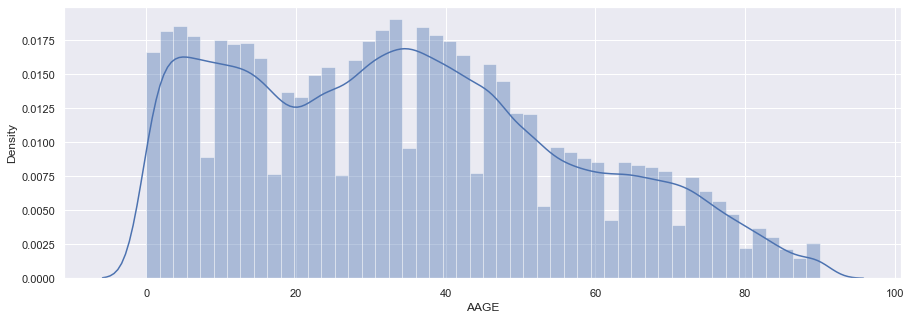

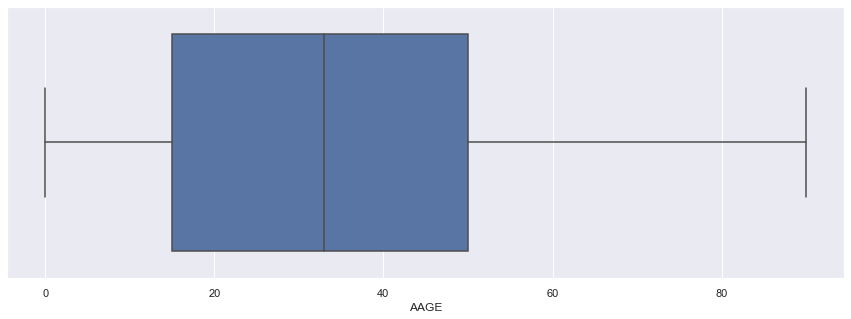

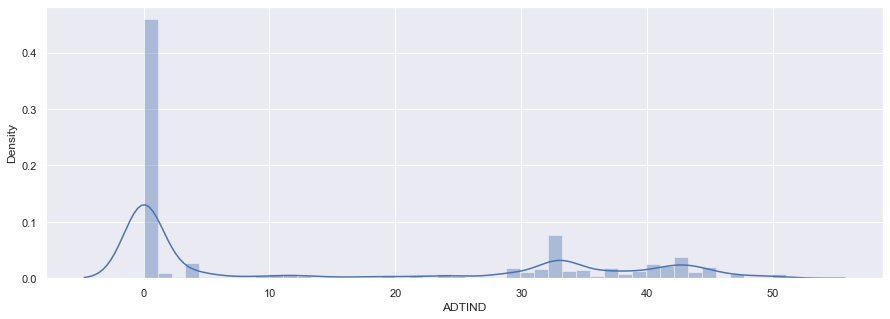

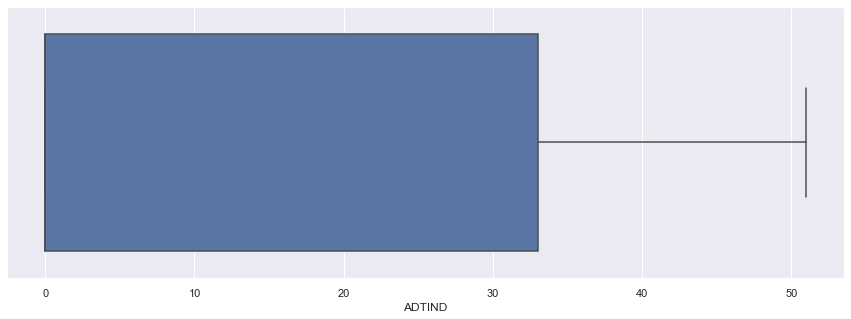

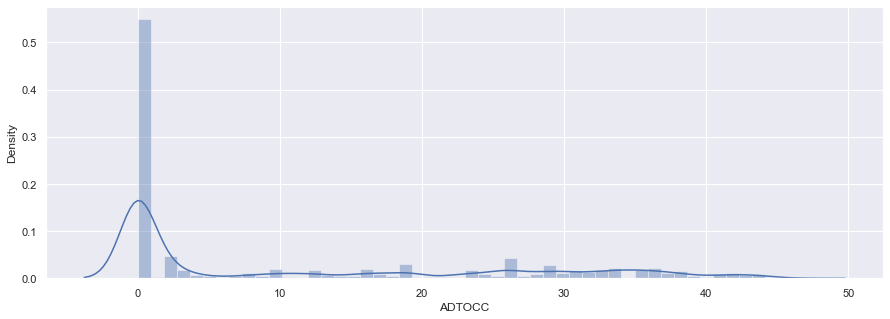

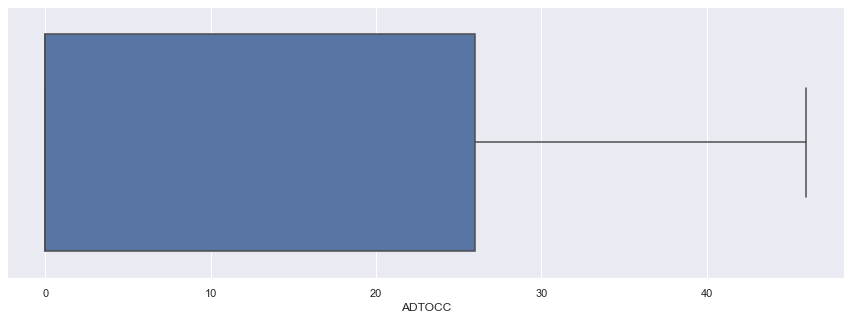

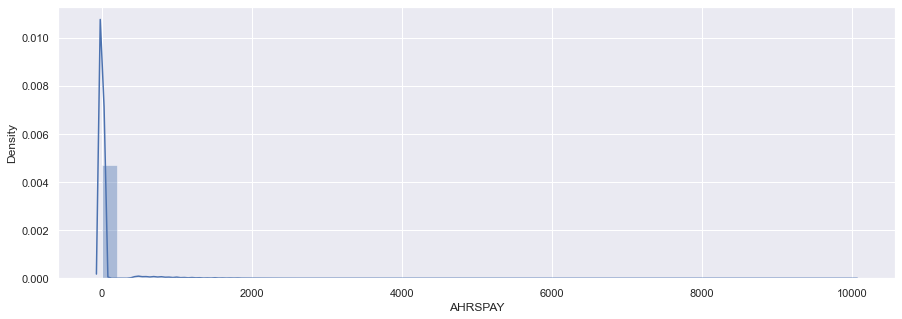

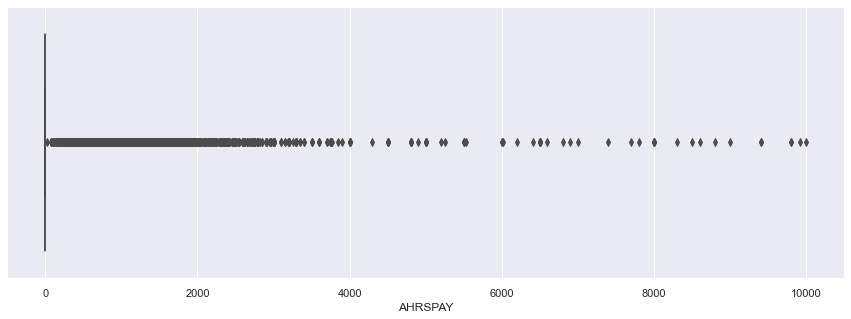

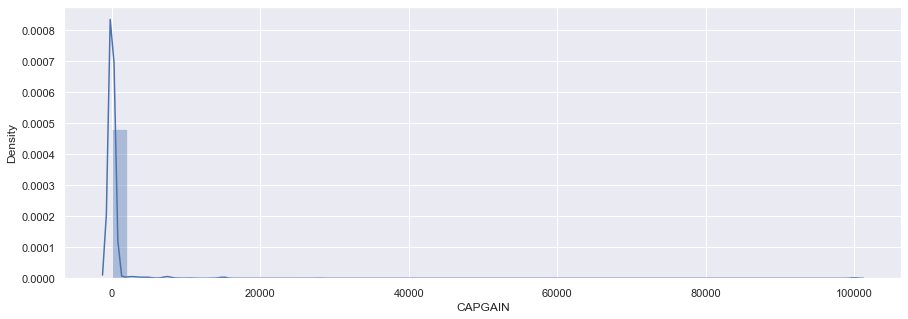

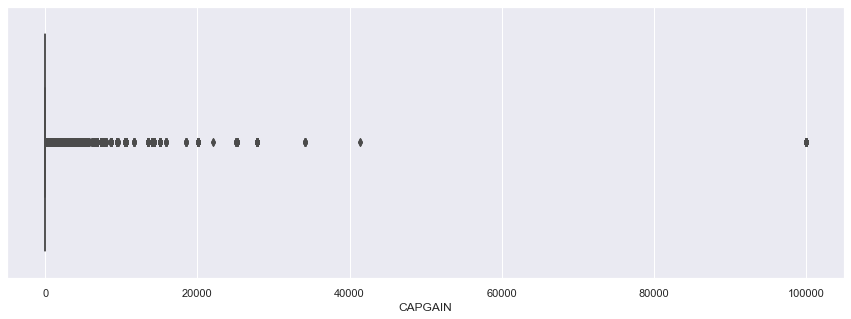

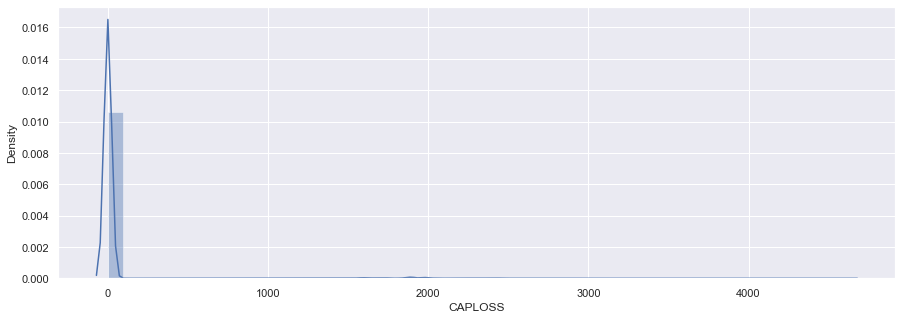

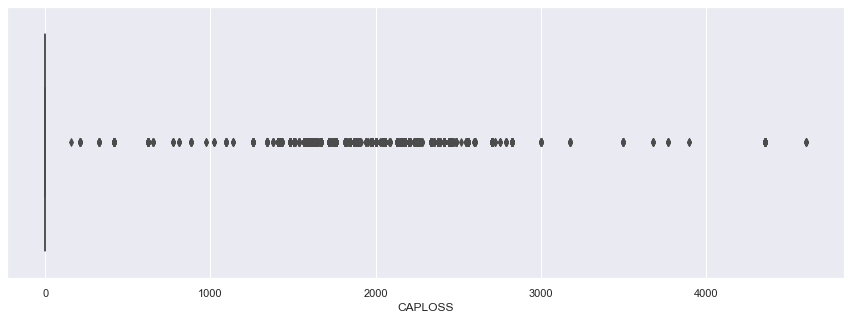

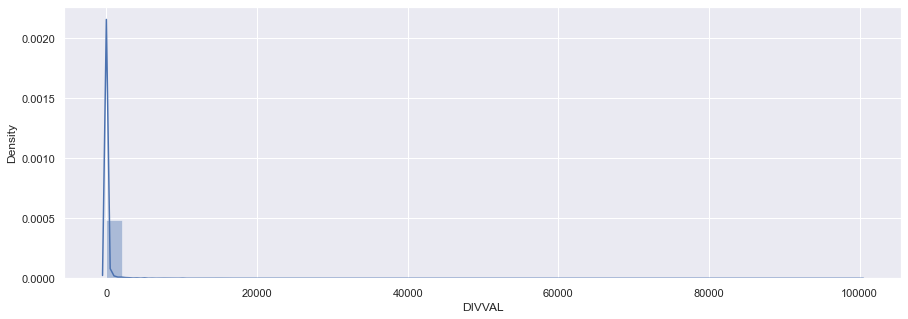

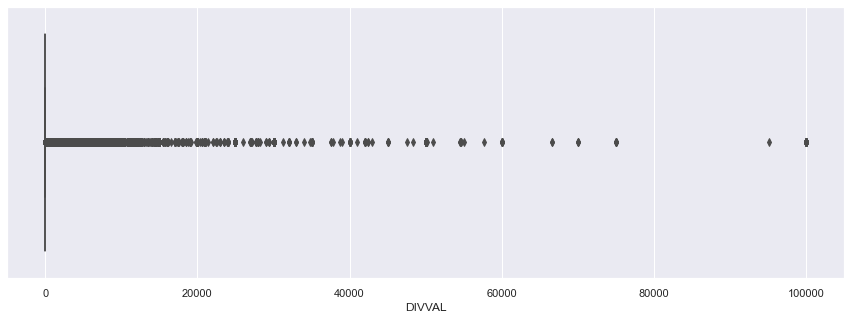

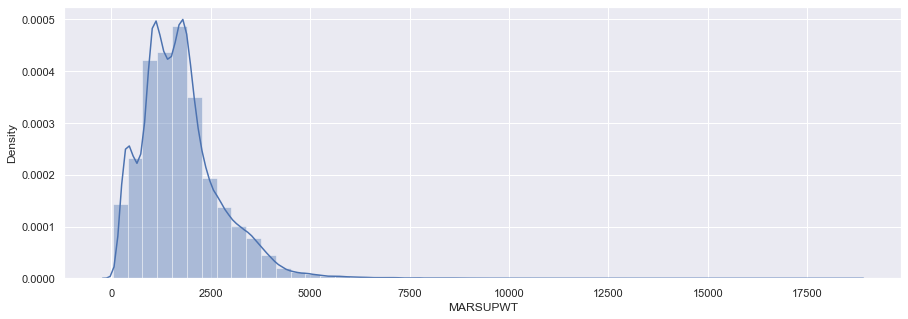

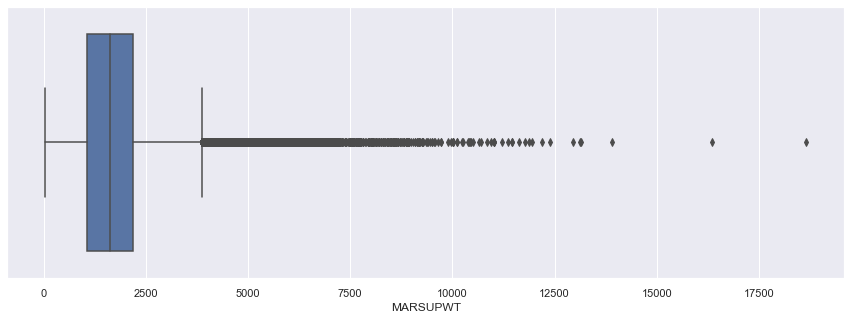

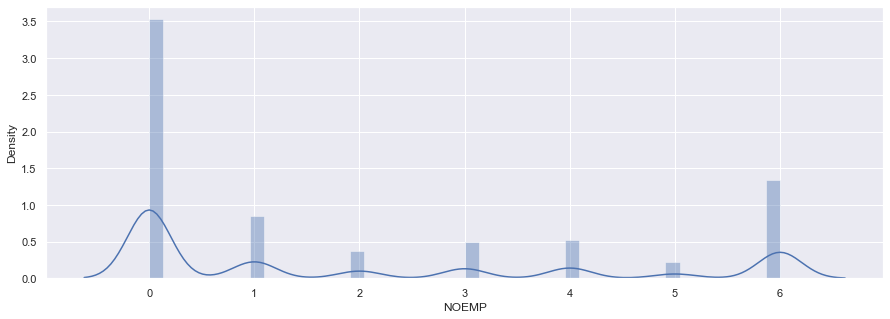

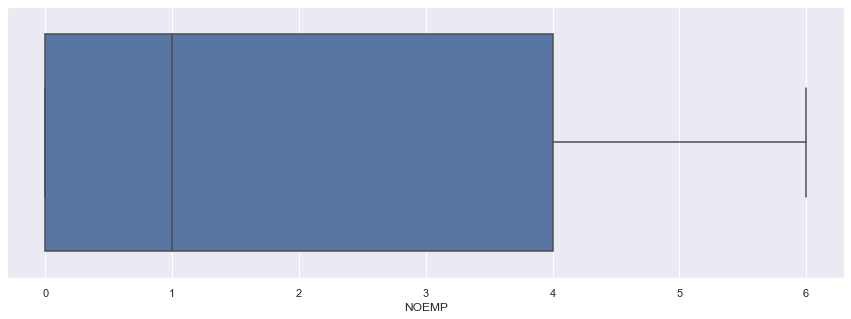

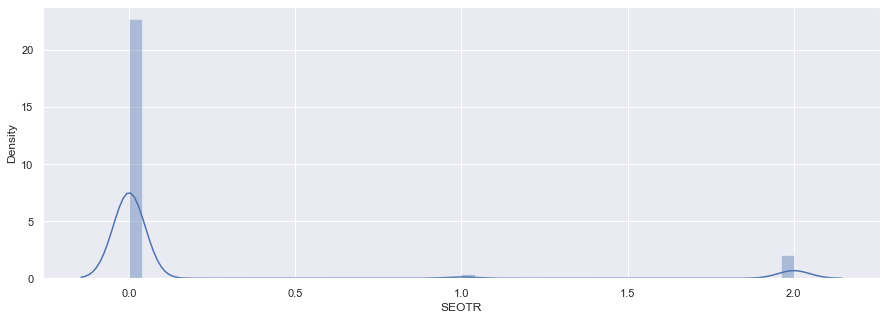

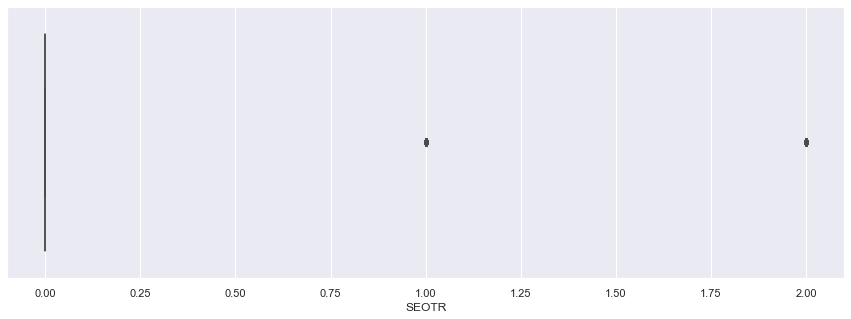

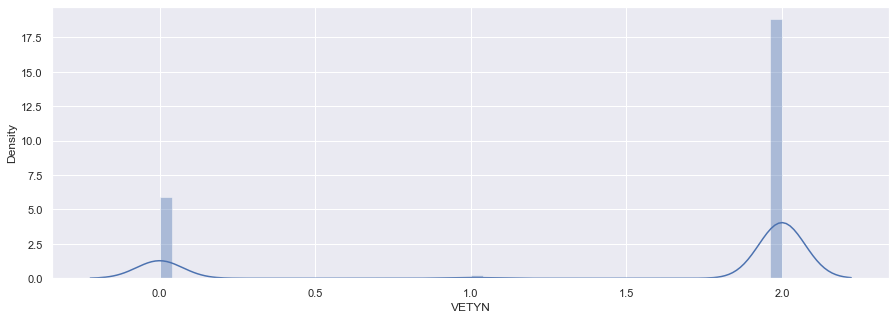

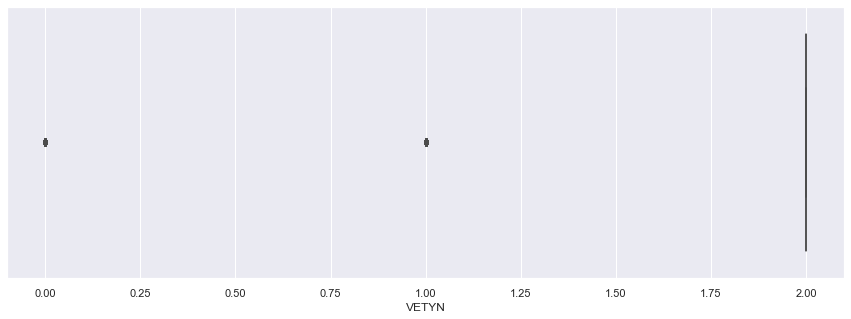

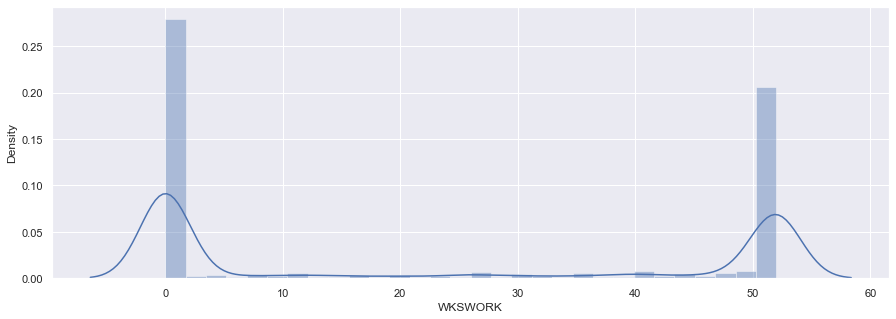

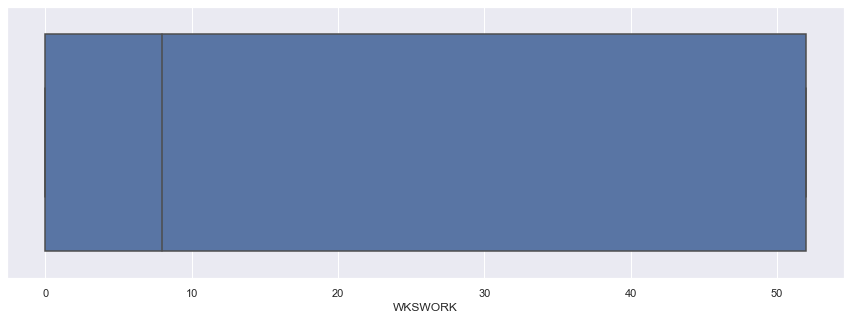

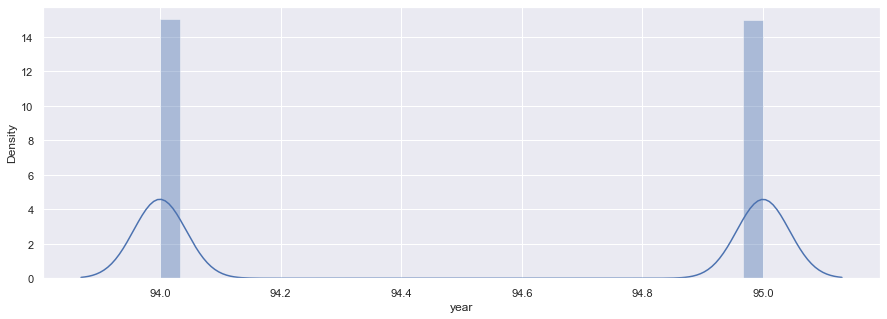

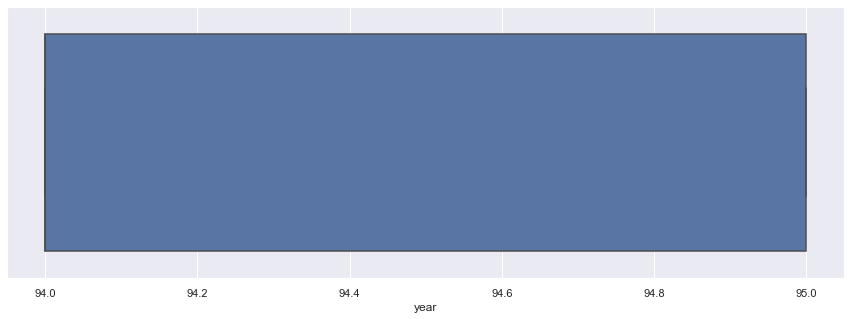

AAGE        None
ADTIND      None
ADTOCC      None
AHRSPAY     None
CAPGAIN     None
CAPLOSS     None
DIVVAL      None
MARSUPWT    None
NOEMP       None
SEOTR       None
VETYN       None
WKSWORK     None
year        None
dtype: object


In [11]:
#Plot histogram is a representation of the distribution of dataset to find Outliers in data
sns.set(rc={'figure.figsize':(15,5)})

#Explore Top values from Features
def find_distribution(x):
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(x)
    plt.show()
    
    sns.boxplot(x)
    plt.show()
    
    
print(numeric_df.apply(find_distribution))



In [12]:
# count of duplicate records
income_learn_df.duplicated().sum()

3229

In [13]:
# count of duplicate records
income_test_df.duplicated().sum()

883

In [14]:
# handle duplicates
income_learn_df = income_learn_df.drop_duplicates()
income_test_df = income_test_df.drop_duplicates()
income_learn_df.shape,income_test_df.shape

((196294, 42), (98879, 42))

In [15]:
#Handle Missing (NA) Data
income_learn_df['AREORGN'] = income_learn_df['AREORGN'].str.strip()
income_learn_df['AREORGN'] = np.where(income_learn_df['AREORGN'].isin(['NA','Do not know']), 'Other', income_learn_df['AREORGN'])

income_learn_df['GRINST'] = income_learn_df['GRINST'].str.strip()
income_learn_df['GRINST'] = np.where(income_learn_df['GRINST'].isin(['?']), 'Other', income_learn_df['GRINST'])

income_learn_df['MIGMTR1'] = income_learn_df['MIGMTR1'].str.strip()
income_learn_df['MIGMTR1'] = np.where(income_learn_df['MIGMTR1'].isin(['?']), 'Other', income_learn_df['MIGMTR1'])

income_learn_df['MIGMTR3'] = income_learn_df['MIGMTR3'].str.strip()
income_learn_df['MIGMTR3'] = np.where(income_learn_df['MIGMTR3'].isin(['?']), 'Other', income_learn_df['MIGMTR3'])

income_learn_df['MIGMTR4'] = income_learn_df['MIGMTR4'].str.strip()
income_learn_df['MIGMTR4'] = np.where(income_learn_df['MIGMTR4'].isin(['?']), 'Other', income_learn_df['MIGMTR4'])

income_learn_df['MIGSUN'] = income_learn_df['MIGSUN'].str.strip()
income_learn_df['MIGSUN'] = np.where(income_learn_df['MIGSUN'].isin(['?']), 'Other', income_learn_df['MIGSUN'])

income_learn_df['PEFNTVTY'] = income_learn_df['PEFNTVTY'].str.strip()
income_learn_df['PEFNTVTY'] = np.where(income_learn_df['PEFNTVTY'].isin(['?']), 'Other', income_learn_df['PEFNTVTY'])

income_learn_df['PEMNTVTY'] = income_learn_df['PEMNTVTY'].str.strip()
income_learn_df['PEMNTVTY'] = np.where(income_learn_df['PEMNTVTY'].isin(['?']), 'Other', income_learn_df['PEMNTVTY'])

income_learn_df['PENATVTY'] = income_learn_df['PENATVTY'].str.strip()
income_learn_df['PENATVTY'] = np.where(income_learn_df['PENATVTY'].isin(['?']), 'Other', income_learn_df['PENATVTY'])

In [16]:
# count of missing records
income_learn_df.isnull().sum()

AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST          0
HHDFMX          0
HHDREL          0
MARSUPWT        0
MIGMTR1         0
MIGMTR3         0
MIGMTR4         0
MIGSAME         0
MIGSUN          0
NOEMP           0
PARENT          0
PEFNTVTY        0
PEMNTVTY        0
PENATVTY        0
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
year            0
income_level    0
dtype: int64

The learning data has 199523 number of instances in Learning and 99762 instances in test dataset with 42 number of features. whereas 3229 records in learning and 883 records in test dataset are duplicated and missing data.Therefore, drop duplicates records. The Data has 12 numeric and 29 categorical features.
 
Outlier detect in ['AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'MARSUPWT', 'SEOTR'] features.Therefore, handle outliers with Winsorize Method and make our upper and lower limits for data our new maximum and minimum points.

In [17]:
#Handle Outliers
#1. wage per hour: AHRSPAY
from scipy.stats import mstats
income_learn_df['AHRSPAY'] = mstats.winsorize(income_learn_df['AHRSPAY'], limits=[0.05, 0.05])

#2. capital gains: CAPGAIN
income_learn_df['CAPGAIN'] = mstats.winsorize(income_learn_df['CAPGAIN'], limits=[0.05, 0.05])

#3. capital losses: CAPLOSS
income_learn_df['CAPLOSS'] = mstats.winsorize(income_learn_df['CAPLOSS'], limits=[0.05, 0.05])

#4. divdends from stocks: DIVVAL
income_learn_df['DIVVAL'] = mstats.winsorize(income_learn_df['DIVVAL'], limits=[0.25, 0.25])

#5. instance weight: MARSUPWT
income_learn_df['MARSUPWT'] = mstats.winsorize(income_learn_df['MARSUPWT'], limits=[0.01, 0.01])

#6. own business or self employed: SEOTR
income_learn_df['SEOTR'] = mstats.winsorize(income_learn_df['SEOTR'], limits=[0.25, 0.25])

#7. veterans benefits: VETYN
income_learn_df['VETYN'] = mstats.winsorize(income_learn_df['VETYN'], limits=[0.25, 0.25])


In [18]:
income_learn_df[['AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','MARSUPWT','SEOTR','VETYN']].describe()

,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,SEOTR,VETYN
count,196294.000000,196294.0,196294.0,196294.0,196294.000000,196294.0,196294.0
mean,28.199181,0.0,0.0,0.0,1732.340478,0.0,2.0
std,114.460784,0.0,0.0,0.0,944.567222,0.0,0.0
min,0.000000,0.0,0.0,0.0,240.970000,0.0,2.0
25%,0.000000,0.0,0.0,0.0,1061.530000,0.0,2.0
50%,0.000000,0.0,0.0,0.0,1620.175000,0.0,2.0
75%,0.000000,0.0,0.0,0.0,2194.060000,0.0,2.0
max,500.000000,0.0,0.0,0.0,4797.910000,0.0,2.0


In [19]:
#Handle Outliers in test data
#1. wage per hour: AHRSPAY
from scipy.stats import mstats
income_test_df['AHRSPAY'] = mstats.winsorize(income_test_df['AHRSPAY'], limits=[0.05, 0.05])

#2. capital gains: CAPGAIN
income_test_df['CAPGAIN'] = mstats.winsorize(income_test_df['CAPGAIN'], limits=[0.05, 0.05])

#3. capital losses: CAPLOSS
income_test_df['CAPLOSS'] = mstats.winsorize(income_test_df['CAPLOSS'], limits=[0.05, 0.05])

#4. divdends from stocks: DIVVAL
income_test_df['DIVVAL'] = mstats.winsorize(income_test_df['DIVVAL'], limits=[0.25, 0.25])

#5. instance weight: MARSUPWT
income_test_df['MARSUPWT'] = mstats.winsorize(income_test_df['MARSUPWT'], limits=[0.01, 0.01])

#6. own business or self employed: SEOTR
income_test_df['SEOTR'] = mstats.winsorize(income_test_df['SEOTR'], limits=[0.25, 0.25])

#7. veterans benefits: VETYN
income_test_df['VETYN'] = mstats.winsorize(income_test_df['VETYN'], limits=[0.25, 0.25])


In [20]:
income_test_df[['AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','MARSUPWT','SEOTR','VETYN']].describe()

,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,SEOTR,VETYN
count,98879.000000,98879.0,98879.0,98879.0,98879.000000,98879.0,98879.0
mean,27.666158,0.0,0.0,0.0,1730.698112,0.0,2.0
std,113.446321,0.0,0.0,0.0,944.968230,0.0,0.0
min,0.000000,0.0,0.0,0.0,241.670000,0.0,2.0
25%,0.000000,0.0,0.0,0.0,1058.140000,0.0,2.0
50%,0.000000,0.0,0.0,0.0,1616.890000,0.0,2.0
75%,0.000000,0.0,0.0,0.0,2190.470000,0.0,2.0
max,500.000000,0.0,0.0,0.0,4802.200000,0.0,2.0


# Feature Engineering

<AxesSubplot:>

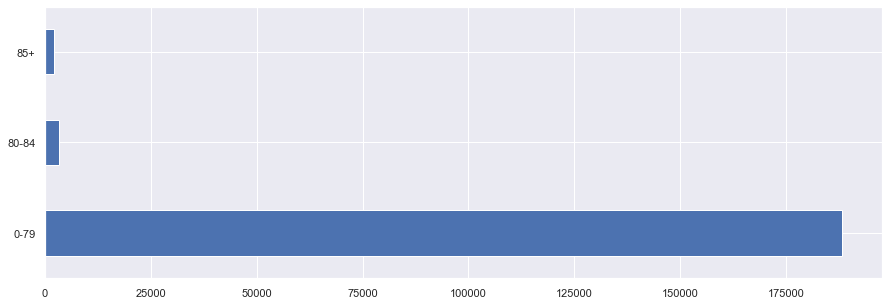

In [21]:
'''
Divide Person Age into Bins:

Values: 
00-79 = 0-79 years of age
80 = 80-84 years of age
85-90 = 85+ years of age

'''
income_learn_df['Age'] = pd.cut(income_learn_df['AAGE'], [0, 79, 84,90], labels=['0-79', '80-84', '85+'])
income_test_df['Age'] = pd.cut(income_test_df['AAGE'], [0, 79, 84,90], labels=['0-79', '80-84', '85+'])
income_learn_df['Age'].value_counts()
income_learn_df['Age'].value_counts().plot(kind='barh')

In [22]:
income_learn_df['ACLSWKR'] = income_learn_df['ACLSWKR'].str.strip()
income_test_df['ACLSWKR'] = income_test_df['ACLSWKR'].str.strip()

WC_dict = {'Self-employed-not incorporated':'Private','Local government':'Government','State government':'Government',\
          'Self-employed-incorporated':'Private','Federal government':'Government'}

income_learn_df['WorkerClass'] = income_learn_df['ACLSWKR']
income_learn_df['WorkerClass'] = income_learn_df['WorkerClass'].replace(WC_dict)

income_test_df['WorkerClass'] = income_test_df['ACLSWKR']
income_test_df['WorkerClass'] = income_test_df['WorkerClass'].replace(WC_dict)

<AxesSubplot:>

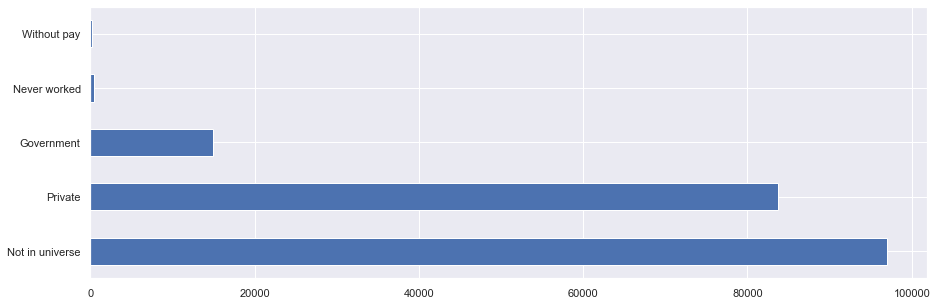

In [23]:
income_learn_df['WorkerClass'].value_counts().plot(kind='barh')

In [24]:
income_learn_df['AHGA'] = income_learn_df['AHGA'].str.strip()
income_test_df['AHGA'] = income_test_df['AHGA'].str.strip()

ED_list = ['Some college but no degree','7th and 8th grade','10th grade','11th grade','9th grade','5th or 6th grade',\
          '12th grade no diploma','1st 2nd 3rd or 4th grade','Less than 1st grade']
income_learn_df['Education'] = income_learn_df['AHGA']
income_learn_df['Education'] = np.where(income_learn_df['AHGA'].isin(ED_list), 'Dropout', income_learn_df['AHGA'])

income_test_df['Education'] = income_test_df['AHGA']
income_test_df['Education'] = np.where(income_test_df['AHGA'].isin(ED_list), 'Dropout', income_test_df['AHGA'])


<AxesSubplot:>

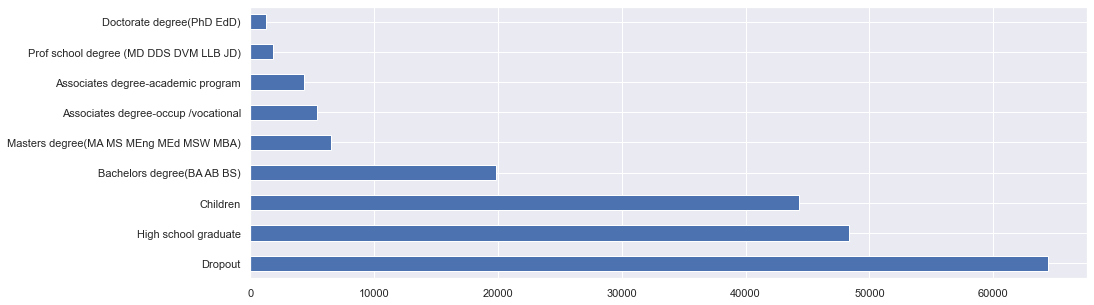

In [25]:
income_learn_df['Education'].value_counts().plot(kind='barh')

In [26]:
income_learn_df['AMARITL'] = income_learn_df['AMARITL'].str.strip()
income_test_df['AMARITL'] = income_test_df['AMARITL'].str.strip()

MS_list = ['Married-civilian spouse present','Married-A F spouse present']
income_learn_df['SpouseStatus'] = income_learn_df['AMARITL']
income_learn_df['SpouseStatus'] = np.where(income_learn_df['AMARITL'].isin(MS_list), 'spouse present', 'spouse absent')

income_test_df['SpouseStatus'] = income_test_df['AMARITL']
income_test_df['SpouseStatus'] = np.where(income_test_df['AMARITL'].isin(MS_list), 'spouse present', 'spouse absent')


<AxesSubplot:>

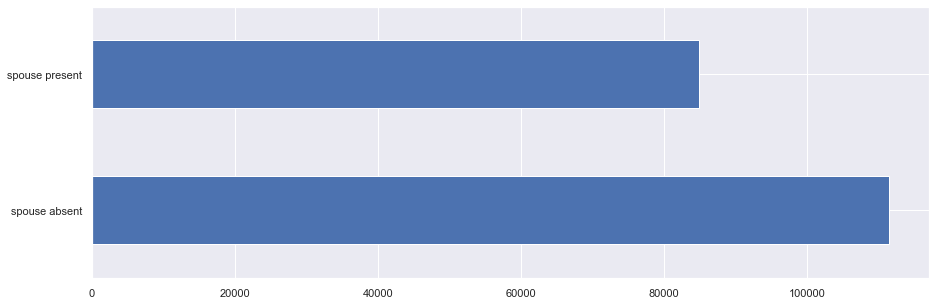

In [27]:
income_learn_df['SpouseStatus'].value_counts().plot(kind='barh')

### Define Target

- Prediction Type: Binary Classification
- Target Variable: income_level

<AxesSubplot:>

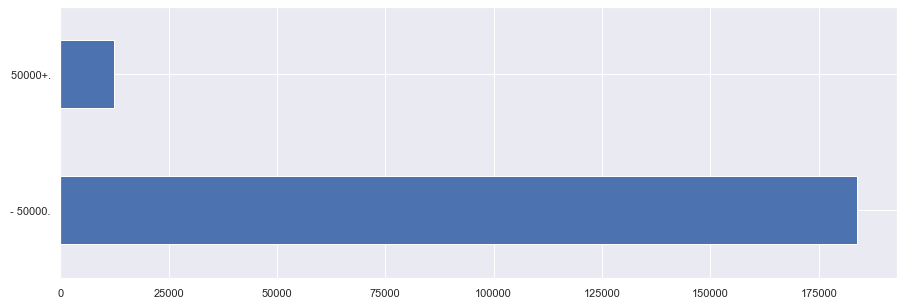

In [28]:
# Target classes
income_learn_df['income_level'].value_counts().plot(kind='barh')

In [29]:
income_learn_df['income_level'].value_counts(normalize=True)

 - 50000.    0.936921
 50000+.     0.063079
Name: income_level, dtype: float64

The data is imbalanced because 93.70% population having less than 50000, only 6.30% people earning more than 50000

### Handle Data Imbalancing

In [30]:
def Downsample_Data(df):
    # Separate majority(Class with - 50000.) and minority(Class with 50000+.) classes
    df.income_level = df.income_level.str.strip()
    df_majority = df[df.income_level=='- 50000.']
    df_minority = df[df.income_level=='50000+.']
    
    from sklearn.utils import resample

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=df_minority.shape[0],     # to match minority class
                                     random_state=123) # reproducible results

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])

    return df_downsampled

In [31]:
income_learn_balanced = Downsample_Data(income_learn_df)
income_learn_balanced.income_level.value_counts()

- 50000.    12382
50000+.     12382
Name: income_level, dtype: int64

In [32]:
income_test_balanced = Downsample_Data(income_test_df)
income_test_balanced.income_level.value_counts()

- 50000.    6186
50000+.     6186
Name: income_level, dtype: int64

# Feature Handling
### Data Encoding

In [33]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

income_learn_encoded = income_learn_balanced.apply(label_encoder.fit_transform)
income_test_encoded = income_test_balanced.apply(label_encoder.fit_transform)
income_learn_encoded.shape,income_test_encoded.shape

((24764, 46), (12372, 46))

### Define Train and Test Dataset

In [34]:
#Split Data
TrainingSet = income_learn_encoded
TestingSet = income_test_encoded

X_train = TrainingSet.drop(['income_level'],axis=1)
X_test = TestingSet.drop(['income_level'],axis=1)
y_train = TrainingSet[['income_level']]
y_test = TestingSet[['income_level']]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24764, 45), (12372, 45), (24764, 1), (12372, 1))

In [35]:
### Data Scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scalar.fit_transform(X_test), columns=X_test.columns)
X_train_scaled.shape,X_test_scaled.shape

((24764, 45), (12372, 45))

# Feature Selection
 Feature Selection is effective in reducing the dimensionality, removing irrelevant and redundant feature.

In [36]:
#Lasso Regression for Feature Selection
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train_scaled,y_train)

print("Best alpha %f" % reg.alpha_)
print("Best score %f" % reg.score(X_train_scaled,y_train))

coef = pd.Series(reg.coef_, index = X_train_scaled.columns)

mask=reg.coef_!=0
X_train_selected=X_train_scaled.loc[:,mask]
X_train_selected

Best alpha 0.000125
Best score 0.486862


,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,NOEMP,PARENT,PRCITSHP,VETQVA,WKSWORK,year,Age,WorkerClass,Education,SpouseStatus
0,0.388889,0.500,0.64,0.630435,0.4375,0.0,1.0,0.333333,0.826087,0.500000,...,0.500000,1.00,1.00,0.5,1.000000,0.0,0.0,0.75,0.000,1.0
1,0.333333,0.125,0.82,0.456522,0.7500,0.0,1.0,0.333333,0.521739,0.000000,...,1.000000,1.00,1.00,0.5,1.000000,1.0,0.0,0.00,0.750,1.0
2,0.155556,0.375,0.00,0.000000,0.6250,0.0,1.0,0.666667,0.608696,0.428571,...,0.000000,0.00,1.00,0.5,0.000000,0.0,0.0,0.50,0.375,0.0
3,0.577778,0.375,0.00,0.000000,0.3750,0.0,1.0,0.333333,0.608696,0.428571,...,0.000000,1.00,1.00,0.5,0.000000,0.0,0.0,0.50,0.625,1.0
4,0.166667,0.375,0.00,0.000000,0.3125,0.0,1.0,0.666667,0.608696,0.428571,...,0.000000,0.75,1.00,0.5,0.000000,1.0,0.0,0.50,0.625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24759,0.533333,0.750,0.68,0.043478,0.5625,0.0,1.0,0.500000,0.304348,0.142857,...,0.166667,1.00,0.25,0.5,0.961538,0.0,0.0,0.75,0.250,0.0
24760,0.622222,0.500,0.60,0.043478,0.5625,0.0,1.0,0.333333,0.956522,0.142857,...,1.000000,1.00,1.00,0.5,1.000000,1.0,0.0,0.75,0.250,1.0
24761,0.655556,0.500,0.46,0.043478,0.5625,0.0,1.0,0.333333,0.478261,0.142857,...,0.333333,1.00,1.00,0.5,1.000000,1.0,0.0,0.75,0.250,1.0
24762,0.688889,0.500,0.08,0.043478,1.0000,0.0,1.0,0.500000,0.173913,0.142857,...,1.000000,1.00,1.00,1.0,1.000000,1.0,0.0,0.75,0.625,0.0


In [37]:
Selected_Features = X_train_selected.columns
X_test_selected = X_test_scaled[Selected_Features]

X_train_selected['income_level'] = y_train['income_level'].values
X_test_selected['income_level'] = y_test['income_level'].values

X_train_selected.to_csv(data_path+"census_income_learn_processed.csv",index=False)
X_test_selected.to_csv(data_path+"census_income_test_processed.csv",index=False)

In [38]:
Selected_Features

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'HHDFMX', 'HHDREL',
       'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PRCITSHP', 'VETQVA', 'WKSWORK',
       'year', 'Age', 'WorkerClass', 'Education', 'SpouseStatus'],
      dtype='object')